In [58]:
import keras.backend as K
import numpy as np
from keras import Input, layers
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from skimage.transform import resize
from scipy import fftpack
import cv2

In [2]:
source = np.asarray(Image.open("imgh.jpg").convert('L'))

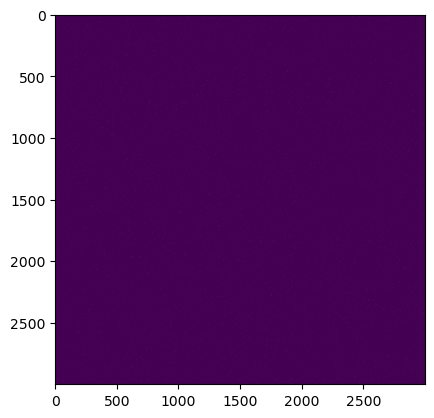

In [3]:
plt.imshow(source)

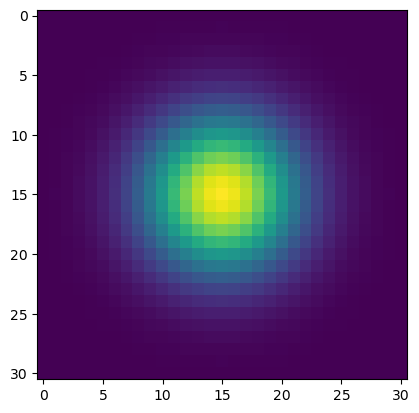

In [52]:
kernel_res = 30
x, y = np.meshgrid(np.linspace(-1,1,kernel_res+1), np.linspace(-1,1,kernel_res+1))
d = np.sqrt(x*x+y*y)
sigma, mu = 0.3, 0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
plt.imshow(g)

In [5]:
# g = resize(g, (10, 10,1,1))
# g.shape

(10, 10, 1, 1)

In [6]:
def my_filter(shape, dtype=None):

    f = g
    
#     assert f.shape == shape
    return K.variable(f, dtype='float32')

In [7]:
input_mat = source

# we need to give the batch size. 
# here we will just add a dimension at the beginning which makes batch size=1
print(input_mat.shape)
input_mat = input_mat.reshape((1, input_mat.shape[0], input_mat.shape[1], 1))

(3000, 3000)


In [8]:
def build_model():
    input_tensor = Input(shape=(source.shape[0], source.shape[1], 1))

    x = layers.Conv2D(filters=1, 
                      kernel_size = 10,
                      kernel_initializer=my_filter,
                      strides=2, 
                      padding='valid') (input_tensor)

    model = Model(inputs=input_tensor, outputs=x)
    return model

In [9]:
# model = build_model()
# out = model.predict(input_mat)
# print(out.shape)
# output = out.reshape((996,996)) 
# fig, ax = plt.subplots(1,2, figsize=(10,5))
# ax[0].imshow(output)
# ax[1].imshow(source)
# plt.imsave("gussian_conv.jpg", output, cmap="gray")

In [10]:
18710016/5622

3328.0

In [11]:
img = plt.imread('imgh.jpg')
# plt.figure()
# plt.imshow(img)

In [53]:
# First a 1-D  Gaussian
# t = np.linspace(-10, 10, 30)
# bump = np.exp(-0.4*t**2)
# bump /= np.trapz(bump) # normalize the integral to 1

# # make a 2-D kernel out of it
# kernel = bump[:, np.newaxis] * bump[np.newaxis, :]
kernel = g

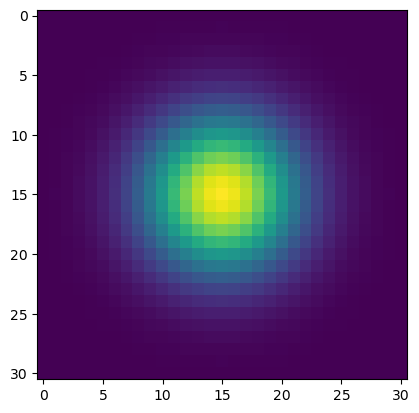

In [54]:
plt.imshow(kernel)

In [56]:
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT
# kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# # convolve
# img_ft = fftpack.fft2(img, axes=(0, 1))
# # the 'newaxis' is to match to color direction
# img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
# img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# # clip values to range
# img2 = np.clip(img2, 0, 1)

# # plot output
# # plt.figure()
# plt.imsave('conv_imgh.jpg', img2)

In [63]:
kernel_size = (10, 10)
sigma = 3
blurred_image = cv2.GaussianBlur(img, kernel_size, sigma)
plt.imshow(blurred_image)

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:293: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'createGaussianKernels'
